# **8. Edge Detection**

Edge detection is a fundamental operation in image processing and computer vision. It highlights significant transitions in intensity, which usually correspond to object boundaries, textures, or features. Detecting edges helps simplify the image while preserving structural information, making it easier for algorithms to analyze shapes, patterns, or movements.

OpenCV provides several popular edge detection techniques:

### **1. Sobel Operator**

The Sobel operator computes the gradient of the image intensity in horizontal and vertical directions. It emphasizes areas of high spatial frequency, i.e., regions with sharp changes in intensity.

* Horizontal edges: Highlights transitions along the vertical direction.
* Vertical edges: Highlights transitions along the horizontal direction.

### **2. Laplacian Operator**

The Laplacian is a second-order derivative operator that detects edges in all directions simultaneously. Unlike Sobel, it does not differentiate between horizontal or vertical edges, making it sensitive to fine details but also noise.

### **3. Canny Edge Detector**

Canny is a multi-stage, robust edge detection algorithm that produces thin, well-defined edges. It involves:
* Smoothing the image using a Gaussian filter.
* Calculating intensity gradients.
* Applying non-maximum suppression to thin edges.
* Using double thresholding and edge tracking to finalize edges.

Canny is widely used due to its accuracy and noise resistance.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load tiger image
img = cv2.imread('tiger.jpg', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
noise = np.random.normal(0, 25, img.shape)
img_noisy = cv2.add(img, noise.astype(np.uint8))

# ---- Original image edges ----
sx = cv2.Sobel(img, cv2.CV_64F, 1, 0, 3)
sy = cv2.Sobel(img, cv2.CV_64F, 0, 1, 3)
mag = cv2.magnitude(sx, sy)
direction = cv2.phase(sx, sy, angleInDegrees=True)
lap = cv2.Laplacian(img, cv2.CV_64F)
can = cv2.Canny(img, 100, 200)

edges_original = [
    ("Original", img, "gray"),
    ("Sobel X", cv2.convertScaleAbs(sx), "gray"),
    ("Sobel Y", cv2.convertScaleAbs(sy), "gray"),
    ("Gradient Magnitude", cv2.convertScaleAbs(mag), "gray"),
    ("Gradient Direction", direction, "hsv"),
    ("Laplacian", cv2.convertScaleAbs(lap), "gray"),
    ("Canny", can, "gray"),
]

# ---- Noisy image edges ----
sx_n = cv2.Sobel(img_noisy, cv2.CV_64F, 1, 0, 3)
sy_n = cv2.Sobel(img_noisy, cv2.CV_64F, 0, 1, 3)
mag_n = cv2.magnitude(sx_n, sy_n)
can_n = cv2.Canny(img_noisy, 100, 200)

edges_noisy = [
    ("Noisy", img_noisy, "gray"),
    ("Sobel X (Noisy)", cv2.convertScaleAbs(sx_n), "gray"),
    ("Sobel Y (Noisy)", cv2.convertScaleAbs(sy_n), "gray"),
    ("Gradient Magnitude (Noisy)", cv2.convertScaleAbs(mag_n), "gray"),
    ("Canny (Noisy)", can_n, "gray"),
]

# ---- Function to plot ----
def plot_edges(edge_list, ncols=3, figsize=(14, 12), title_prefix=""):
    nplots = len(edge_list)
    nrows = (nplots + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.ravel()
    for ax, (title, img, cmap) in zip(axes, edge_list):
        ax.imshow(img, cmap=cmap)
        ax.set_title(f"{title_prefix}{title}", fontsize=12, pad=8)
        ax.axis("off")
    for ax in axes[len(edge_list):]:
        ax.axis("off")
    plt.tight_layout()
    plt.show()


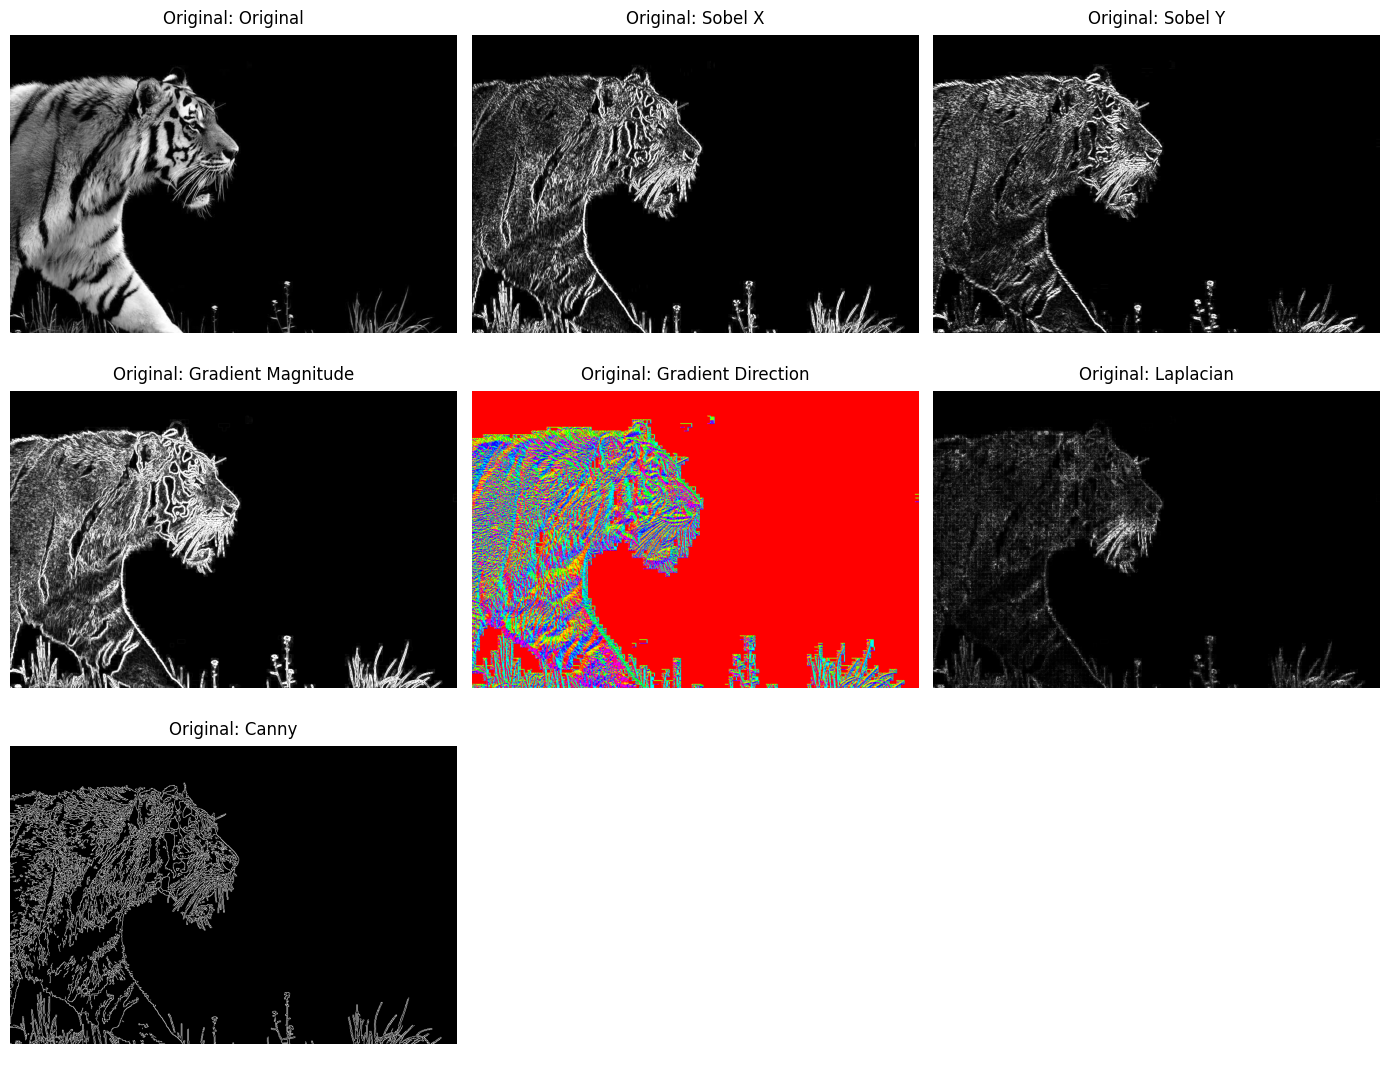

In [ ]:
plot_edges(edges_original, ncols=3, figsize=(14,11), title_prefix="Original: ")

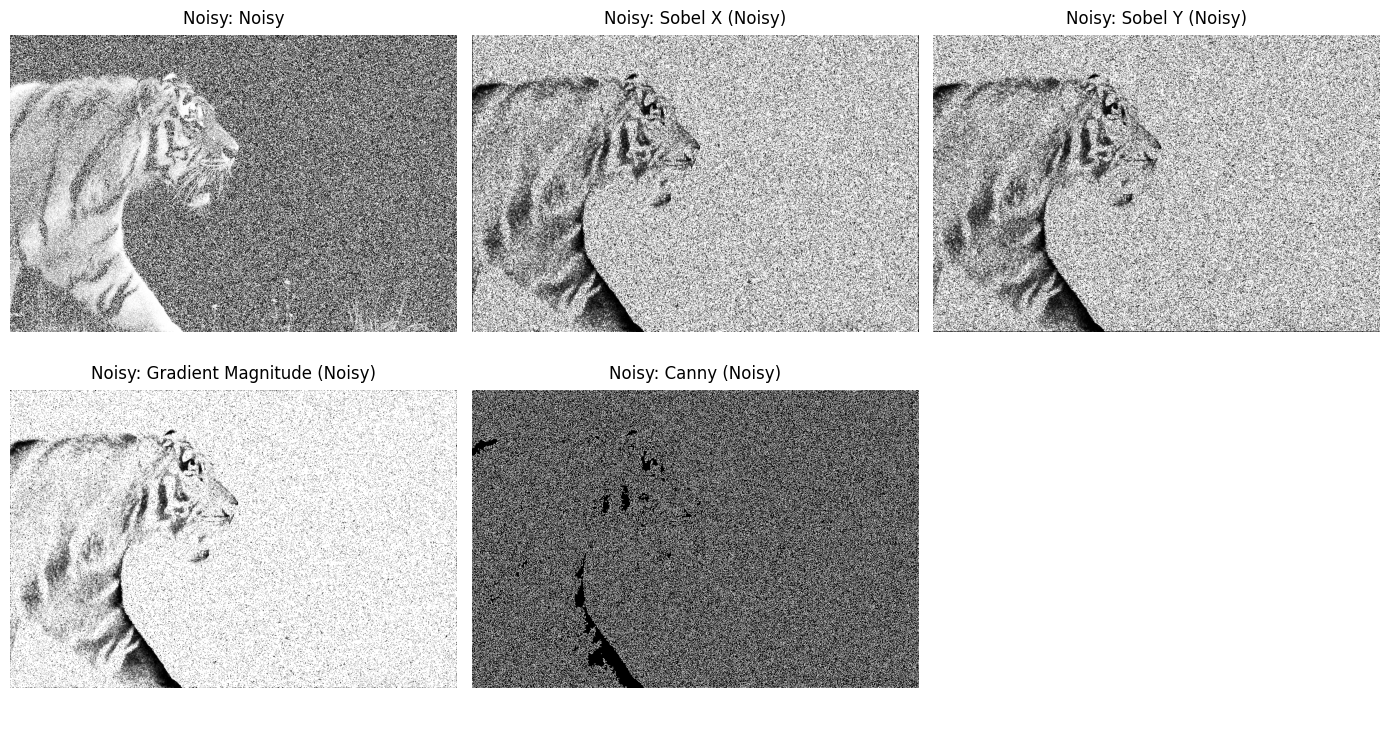

In [ ]:
plot_edges(edges_noisy, ncols=3, figsize=(14,7.5), title_prefix="Noisy: ")

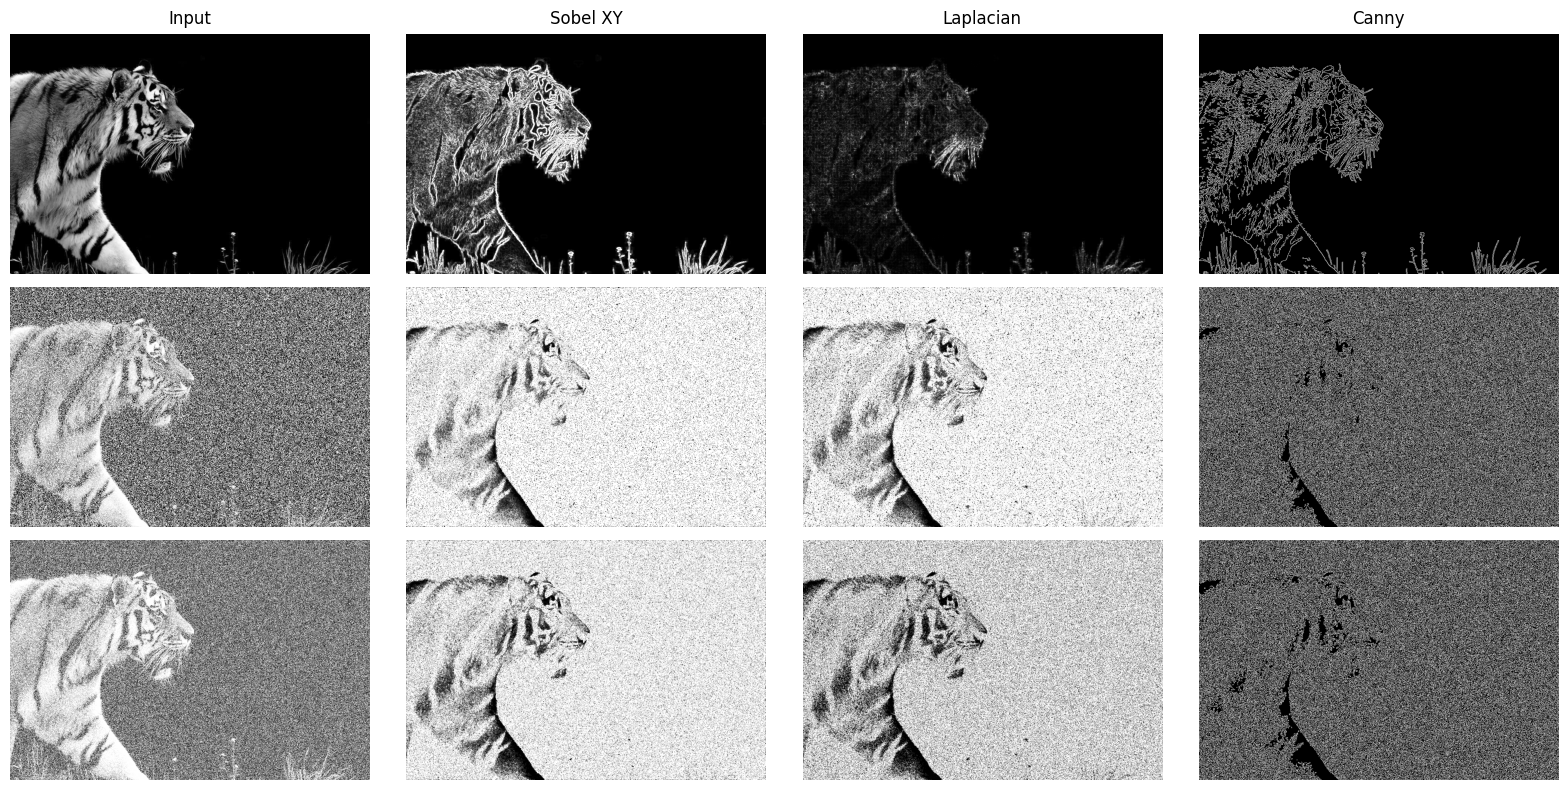

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load tiger image in grayscale
img = cv2.imread('tiger.jpg', cv2.IMREAD_GRAYSCALE)

# ---- Function to add Gaussian noise ----
def add_noise(image, sigma):
    noise = np.random.normal(0, sigma, image.shape)
    noisy_img = cv2.add(image, noise.astype(np.uint8))
    return noisy_img

# ---- Function to compute edge detectors ----
def compute_edges(image):
    sobel = cv2.convertScaleAbs(cv2.magnitude(
        cv2.Sobel(image, cv2.CV_64F, 1, 0, 3),
        cv2.Sobel(image, cv2.CV_64F, 0, 1, 3)
    ))
    laplacian = cv2.convertScaleAbs(cv2.Laplacian(image, cv2.CV_64F))
    canny = cv2.Canny(image, 100, 200)
    return sobel, laplacian, canny

# ---- Prepare images ----
moderate_noise = add_noise(img, sigma=15)
high_noise = add_noise(img, sigma=75)

# Original edges
sobel_orig, lap_orig, canny_orig = compute_edges(img)
# Moderate noise edges
sobel_mod, lap_mod, canny_mod = compute_edges(moderate_noise)
# High noise edges
sobel_high, lap_high, canny_high = compute_edges(high_noise)

# ---- Organize for plotting ----
edge_sets = [
    ("Original", img, sobel_orig, lap_orig, canny_orig),
    ("Moderate Noise", moderate_noise, sobel_mod, lap_mod, canny_mod),
    ("High Noise", high_noise, sobel_high, lap_high, canny_high),
]

titles = ["Input", "Sobel XY", "Laplacian", "Canny"]

# ---- Plot ----
fig, axes = plt.subplots(len(edge_sets), 4, figsize=(16, 8))
for row, (label, inp, sob, lap, can) in enumerate(edge_sets):
    for col, img_to_show in enumerate([inp, sob, lap, can]):
        ax = axes[row, col]
        cmap = 'gray'
        ax.imshow(img_to_show, cmap=cmap)
        if row == 0:
            ax.set_title(titles[col], fontsize=12, pad=8)
        if col == 0:
            ax.set_ylabel(label, fontsize=12)
        ax.axis("off")

plt.tight_layout()
plt.show()